# Machine Learning 1: simple Breast Cancer detection with K-NN

Data set: Breast Cancer Wisconsin (Diagnostic) Database <br>
Goal: create a classifier that can help diagnose patients.

In [2]:
# Print the data set description
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### class distribution


In [103]:
def class_distribution():
    df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
    df['target'] = cancer.target
    target = df['target'].value_counts()
    target.index = ['malignant', 'benign'] 
    print(target)

### spliting `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [90]:
from sklearn.model_selection import train_test_split

def split_into_train_test():
    X = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
    y = cancer.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    return (X_train, X_test, y_train, y_test)

### Fitting k-nearest classifier


In [91]:
from sklearn.neighbors import KNeighborsClassifier

def fit_classifier():
    X_train, X_test, y_train, y_test = split_into_train_test()
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, y_train)
    return knn

### Predicting class labels


In [99]:
def predict_labels():
    X_train, X_test, y_train, y_test = split_into_train_test()
    knn = fit_classifier()
    prediction = knn.predict(X_test)
    return

### Accuracy score

In [100]:
def acc_score(X, y):
    knn = fit_classifier()
    acc_score = knn.score(X, y)
    return acc_score

### Accuracy plot

Try using the plotting function below to visualize the different predicition scores between train and test sets, as well as malignant and benign cells.

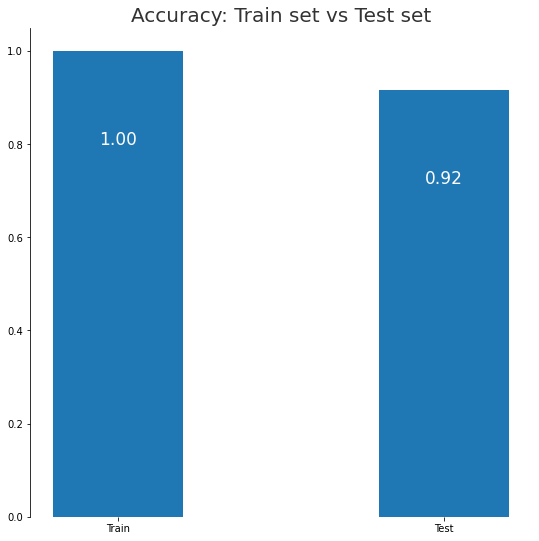

In [107]:
def accuracy_plot():
    import matplotlib.pyplot as plt
    
    # --setting fig--
    fig, ax = plt.subplots(figsize =(9, 9));
    plt.title('Accuracy: Train set vs Test set', alpha=0.8, fontsize=20)
    #plt.xticks([1, 5], (str(s) for s in ['Test', 'Train']), fontsize=20);
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    ax.spines.left.set_visible(True)
    
    # --setting bars--
    X_train, X_test, y_train, y_test = split_into_train_test()
    test_acc = acc_score(X_test, y_test)
    train_acc = acc_score(X_train, y_train)
    
    
    barWidth = 0.4
    bars = plt.bar(['Train', 'Test'], [train_acc, test_acc], align='center', width= barWidth)

    
    # write 'y' value per bar
    for bar in bars:
        height = bar.get_height()
        height = format(height, ".2f")  
        plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() -0.2, str(height),
                       ha='center', color='white', fontsize=17)
   

accuracy_plot()